Q1:

对一副图像做FFT,对频谱进行显示(log增强, FFTshift低频分量到图像的中心)。保留5%,10%，50%,从低频扩大的频域信号,做反傅里叶变换，讨论图像的特征变化。

Q2:
两副图像的FFT。分别使用不同的幅值和相位重构频域图像,然后做反傅里叶变换，讨论得到图像的特征。

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft

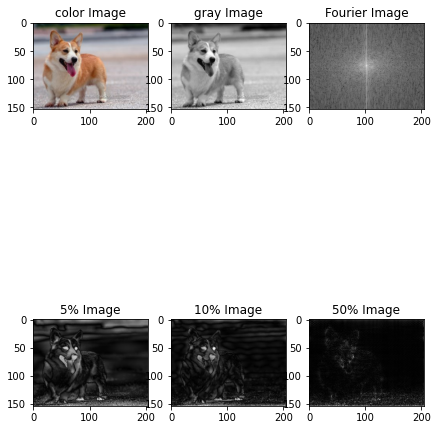

In [27]:
import copy
imgPath ='../../Project/image/dog.png'
# 读入图片
img = cv2.imread(imgPath)[:,:,::-1]
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#傅里叶变换
f = np.fft.fft2(gray)
fshift_list =[copy.deepcopy(np.fft.fftshift(f)) for _ in range(3)]
res = 20*np.log(np.abs(fshift_list[1]))
# 保留不同百分比的低频信号  
signal_list =[0.05,0.1,0.5]

def signal_change(signal_list,img,fshift_list):
    # new_list =[]
    rows, cols = img.shape
    crow,ccol = int(rows/2), int(cols/2)
    for index,item in enumerate(fshift_list):
        temp_d = int(signal_list[index]*crow) 
        item[crow-temp_d : crow+temp_d, ccol-temp_d:ccol+temp_d]=0 
        # new_list.append(item)
    return fshift_list
fshifts=signal_change(signal_list,gray,fshift_list)
#傅里叶逆变换
def Ishift(fshift):
    imgs = []
    for item in fshift:
        ishift = fft.ifftshift(item)
        iimg = np.abs(fft.ifft2(ishift))
        imgs.append(iimg)
    return imgs

imgs = Ishift(fshifts)

show_imgs = [img,gray,res]
for i in imgs:
    show_imgs.append(i)
title_list =['color Image','gray Image','Fourier Image','5% Image','10% Image','50% Image']
show_img(2,3,show_imgs,title_list)

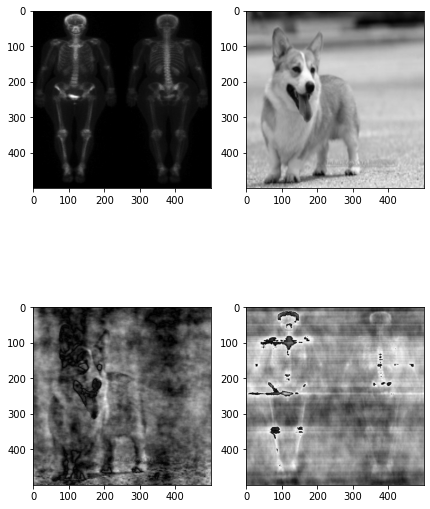

In [26]:
def magnitude_phase_split(img):
 # 分离幅度谱与相位谱
 dft = np.fft.fft2(img)
 dft_shift = np.fft.fftshift(dft)
 # 幅度谱
 magnitude_spectrum = np.abs(dft_shift)
 # 相位谱
 phase_spectrum = np.angle(dft_shift)
 return magnitude_spectrum,phase_spectrum
def magnitude_phase_combine(img_m,img_p):
 # 不同图像幅度谱与相位谱结合
 img_mandp = img_m*np.e**(1j*img_p)
 # 图像重构
 img_mandp = np.uint8(np.abs(np.fft.ifft2(img_mandp)))
 img_mandp =img_mandp/np.max(img_mandp)*255
 return img_mandp
dim = (500,500)
# 读取图像 主图和纹理图
img1 = cv2.imread("../bone-scan.png",0)
img2= cv2.imread(imgPath,0)
img1 = cv2.resize(img1,dim,cv2.INTER_AREA)
img2 = cv2.resize(img2,dim,cv2.INTER_AREA)
# 分离幅度谱与相位谱
img1_m,img1_p = magnitude_phase_split(img1)
img2_m,img2_p = magnitude_phase_split(img2)
# 合并幅度谱与相位谱
# 主图的幅度谱+纹理图的相位谱 以纹理图为主
img_1mAnd2p = magnitude_phase_combine(img1_m,img2_p)
# 纹理图的幅度谱+主图的相位谱 以主图为主
img_2mAnd1p = magnitude_phase_combine(img2_m,img1_p)
def show_img(row,col,img,title=None):
    plt.figure(figsize=(7,10))
    for index,i in enumerate(img):
        plt.subplot(row,col,index+1)
        plt.imshow(i,cmap='gray')
        if title :
            plt.title(title[index])
        else:
            pass
show_img(2,2,[img1,img2,img_1mAnd2p,img_2mAnd1p])